<a href="https://colab.research.google.com/github/camilo299restrepo/Integracion-de-Datos-y-Prospectiva/blob/main/Reto_Caracterizaci%C3%B3n_VA_Fallas_Tecnol%C3%B3gicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gestión del Riesgo Operacional – FINTECH (Fallos Tecnológicos)**

En este espacio de trabajo se plantea como caso de estudio el análisis del riesgo operacional asociado a las operaciones de una FINTECH, específicamente aquel derivado de fallos tecnológicos en las transacciones realizadas por los clientes a través de canales electrónicos.

La FINTECH basa su modelo de negocio en la disponibilidad, estabilidad y correcto funcionamiento de sus plataformas digitales. Por lo tanto, los fallos tecnológicos representan una fuente crítica de riesgo operacional, ya que pueden generar interrupciones en las transacciones, afectaciones a los clientes y pérdidas económicas directas para la organización.

Los riesgos operacionales a los cuales está expuesta la FINTECH se encuentran relacionados con eventos de fallos tecnológicos en los sistemas transaccionales. Este riesgo operacional se describe a través de dos variables aleatorias fundamentales:

**Frecuencia:** Indica el número de fallos tecnológicos que afectan las transacciones de los clientes en un periodo determinado de tiempo.

**Severidad:** Representa el costo económico asociado a cada evento de fallo tecnológico, incluyendo compensaciones a clientes, reprocesos y costos operativos derivados.

**Distribución Agregada de las Pérdidas (LDA – Loss Distribution Approach):**
El producto entre la frecuencia y la severidad permite obtener la distribución agregada de las pérdidas asociadas al riesgo operacional. A partir de esta distribución se realizará la caracterización del riesgo mediante medidas de tendencia central (Media) y medidas de dispersión (Varianza), así como medidas de forma (Coeficiente de Asimetría y Kurtosis).

Para el análisis del riesgo operacional, la FINTECH busca estimar las pérdidas esperadas, pérdidas no esperadas y pérdidas catastróficas, utilizando un enfoque de simulación basado en el método de Montecarlo, con un nivel de confiabilidad del 99,9%. Este enfoque permitirá modelar el comportamiento conjunto de las variables aleatorias de frecuencia y severidad y evaluar de forma integral el impacto económico de los fallos tecnológicos.

El estudio se apoya en la información contenida en el archivo “Fallos Tecnológicos.xlsx”, el cual servirá como base para la simulación, integración y evaluación de los datos del riesgo operacional.

0. Cargar las librerías de trabajo

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Se cargan los archivos de trabajo

/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


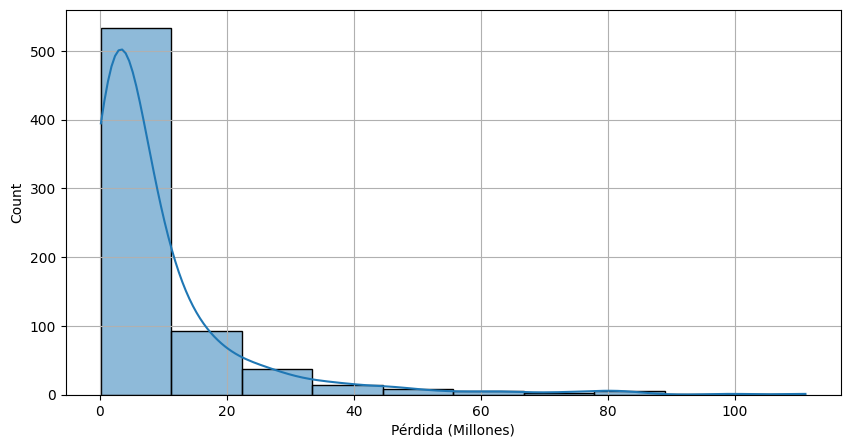

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar archivo
nxl_ft = '/content/drive/MyDrive/Integración de datos y prospectiva/1. FallasTecnológicas (1).xlsx' # Corrected file path
XDB_ft = pd.read_excel(nxl_ft, sheet_name=0)

# Tomar solo las filas con datos (desde fila 1)
Freq_ft = XDB_ft.loc[1:, 'Unnamed: 1']
Sev_ft  = XDB_ft.loc[1:, 'Unnamed: 2']

# Distribución agregada de pérdidas
LDA_ft = Freq_ft * Sev_ft

# Gráfica
plt.figure(figsize=(10,5))
sns.histplot(LDA_ft, bins=10, kde=True)
plt.xlabel("Pérdida (Millones)")
plt.grid()
plt.show()

2. Se procede con la clusterización estadística. La clusterización estadística está definifa por el Histograma de Frecuencias.

In [12]:
np.set_printoptions(suppress=True)
NI=10 #Indica el número de clusters
# Convert LDA_ft to numeric, coercing errors to NaN, then drop NaNs for histogram calculation
# This ensures that np.histogram receives a finite, numeric array.
lda_numeric = pd.to_numeric(LDA_ft, errors='coerce').dropna()
counts,bin_edges=np.histogram(lda_numeric,bins=NI)
print("El número de datos por intervalo es:")
print(counts)
print("Los intervalos inferiores:")
print(bin_edges[:-1])
print("Los intervalos superiores:")
print(bin_edges[1:])
XC=(bin_edges[:-1]+bin_edges[1:])/2

#Se configura la tabla de los datos
Tabla=np.column_stack((bin_edges[:-1],bin_edges[1:],XC,counts))
df=pd.DataFrame(Tabla,columns=['LI','LS','XC','ND'])
df.head(10)

El número de datos por intervalo es:
[533  93  37  14   9   5   3   5   1   1]
Los intervalos inferiores:
[ 0.1423  11.23637 22.33044 33.42451 44.51858 55.61265 66.70672 77.80079
 88.89486 99.98893]
Los intervalos superiores:
[ 11.23637  22.33044  33.42451  44.51858  55.61265  66.70672  77.80079
  88.89486  99.98893 111.083  ]


,LI,LS,XC,ND
0,0.14230,11.23637,5.689335,533.0
1,11.23637,22.33044,16.783405,93.0
2,22.33044,33.42451,27.877475,37.0
3,33.42451,44.51858,38.971545,14.0
4,44.51858,55.61265,50.065615,9.0
5,55.61265,66.70672,61.159685,5.0
6,66.70672,77.80079,72.253755,3.0
7,77.80079,88.89486,83.347825,5.0
8,88.89486,99.98893,94.441895,1.0
9,99.98893,111.08300,105.535965,1.0


3. Se calculan las métricas estadísticas de tendencia central y dispersión: Media, Desviación, Asimetría y Kurtosis.

In [16]:
u_ft = np.mean(LDA_ft)
var_ft = np.var(LDA_ft)
sigma_ft = np.std(LDA_ft)

T2_ft = np.column_stack((u_ft, var_ft, sigma_ft))
df2_ft = pd.DataFrame(T2_ft, columns=['Media', 'Varianza', 'Desviación'])

df2_ft.head(1)


,Media,Varianza,Desviación
0,9.451113,187.894776,13.707472


In [18]:
from scipy.stats import skew, kurtosis

# Calculate skewness using the numeric version of LDA_ft
lda_skew_ft = skew(lda_numeric)

# Calculate kurtosis using the numeric version of LDA_ft
lda_kurtosis_ft = kurtosis(lda_numeric)

df2_temp_ft = df2_ft.copy()
df2_temp_ft['Asimetría'] = lda_skew_ft
df2_temp_ft['Kurtosis'] = lda_kurtosis_ft

display(df2_temp_ft)

,Media,Varianza,Desviación,Asimetría,Kurtosis
0,9.451113,187.894776,13.707472,3.34836,14.167714


**Análisis de Resultados**


A partir de las métricas de tendencia central y dispersión, se observa que la distribución de las pérdidas asociadas a fallas tecnológicas presenta una media relativamente baja (9.45) frente a su desviación estándar (13.71), lo que indica una alta variabilidad relativa respecto al valor esperado de las pérdidas.

El coeficiente de asimetría (3.3484) es positivo y considerablemente mayor que la unidad, lo cual evidencia una cola larga hacia la derecha. Esto implica que la mayoría de los eventos de pérdida se concentran en valores inferiores a la media, mientras que existen pocos eventos de alta severidad que incrementan el valor promedio. En términos de riesgo operacional, esto sugiere que las fallas tecnológicas generan principalmente pérdidas frecuentes de bajo impacto, acompañadas ocasionalmente por eventos extremos.

Por su parte, el coeficiente de curtosis (14.1677) indica una distribución leptocúrtica, caracterizada por una fuerte concentración de observaciones alrededor de valores bajos y una mayor probabilidad de ocurrencia de eventos extremos en comparación con una distribución normal. Este comportamiento es consistente con la naturaleza de los riesgos tecnológicos, donde incidentes poco frecuentes (caídas de sistemas, errores críticos o ciberfallos) pueden ocasionar pérdidas significativas no esperadas.